# Unsupervised_Algorithmns_Final_Project
Roberto Carrasco

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.mixture import GaussianMixture

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
outcome = data['Outcome']
predictors = data.drop('Outcome', axis=1)

In [8]:
outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\Roberto\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roberto\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roberto\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Roberto\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

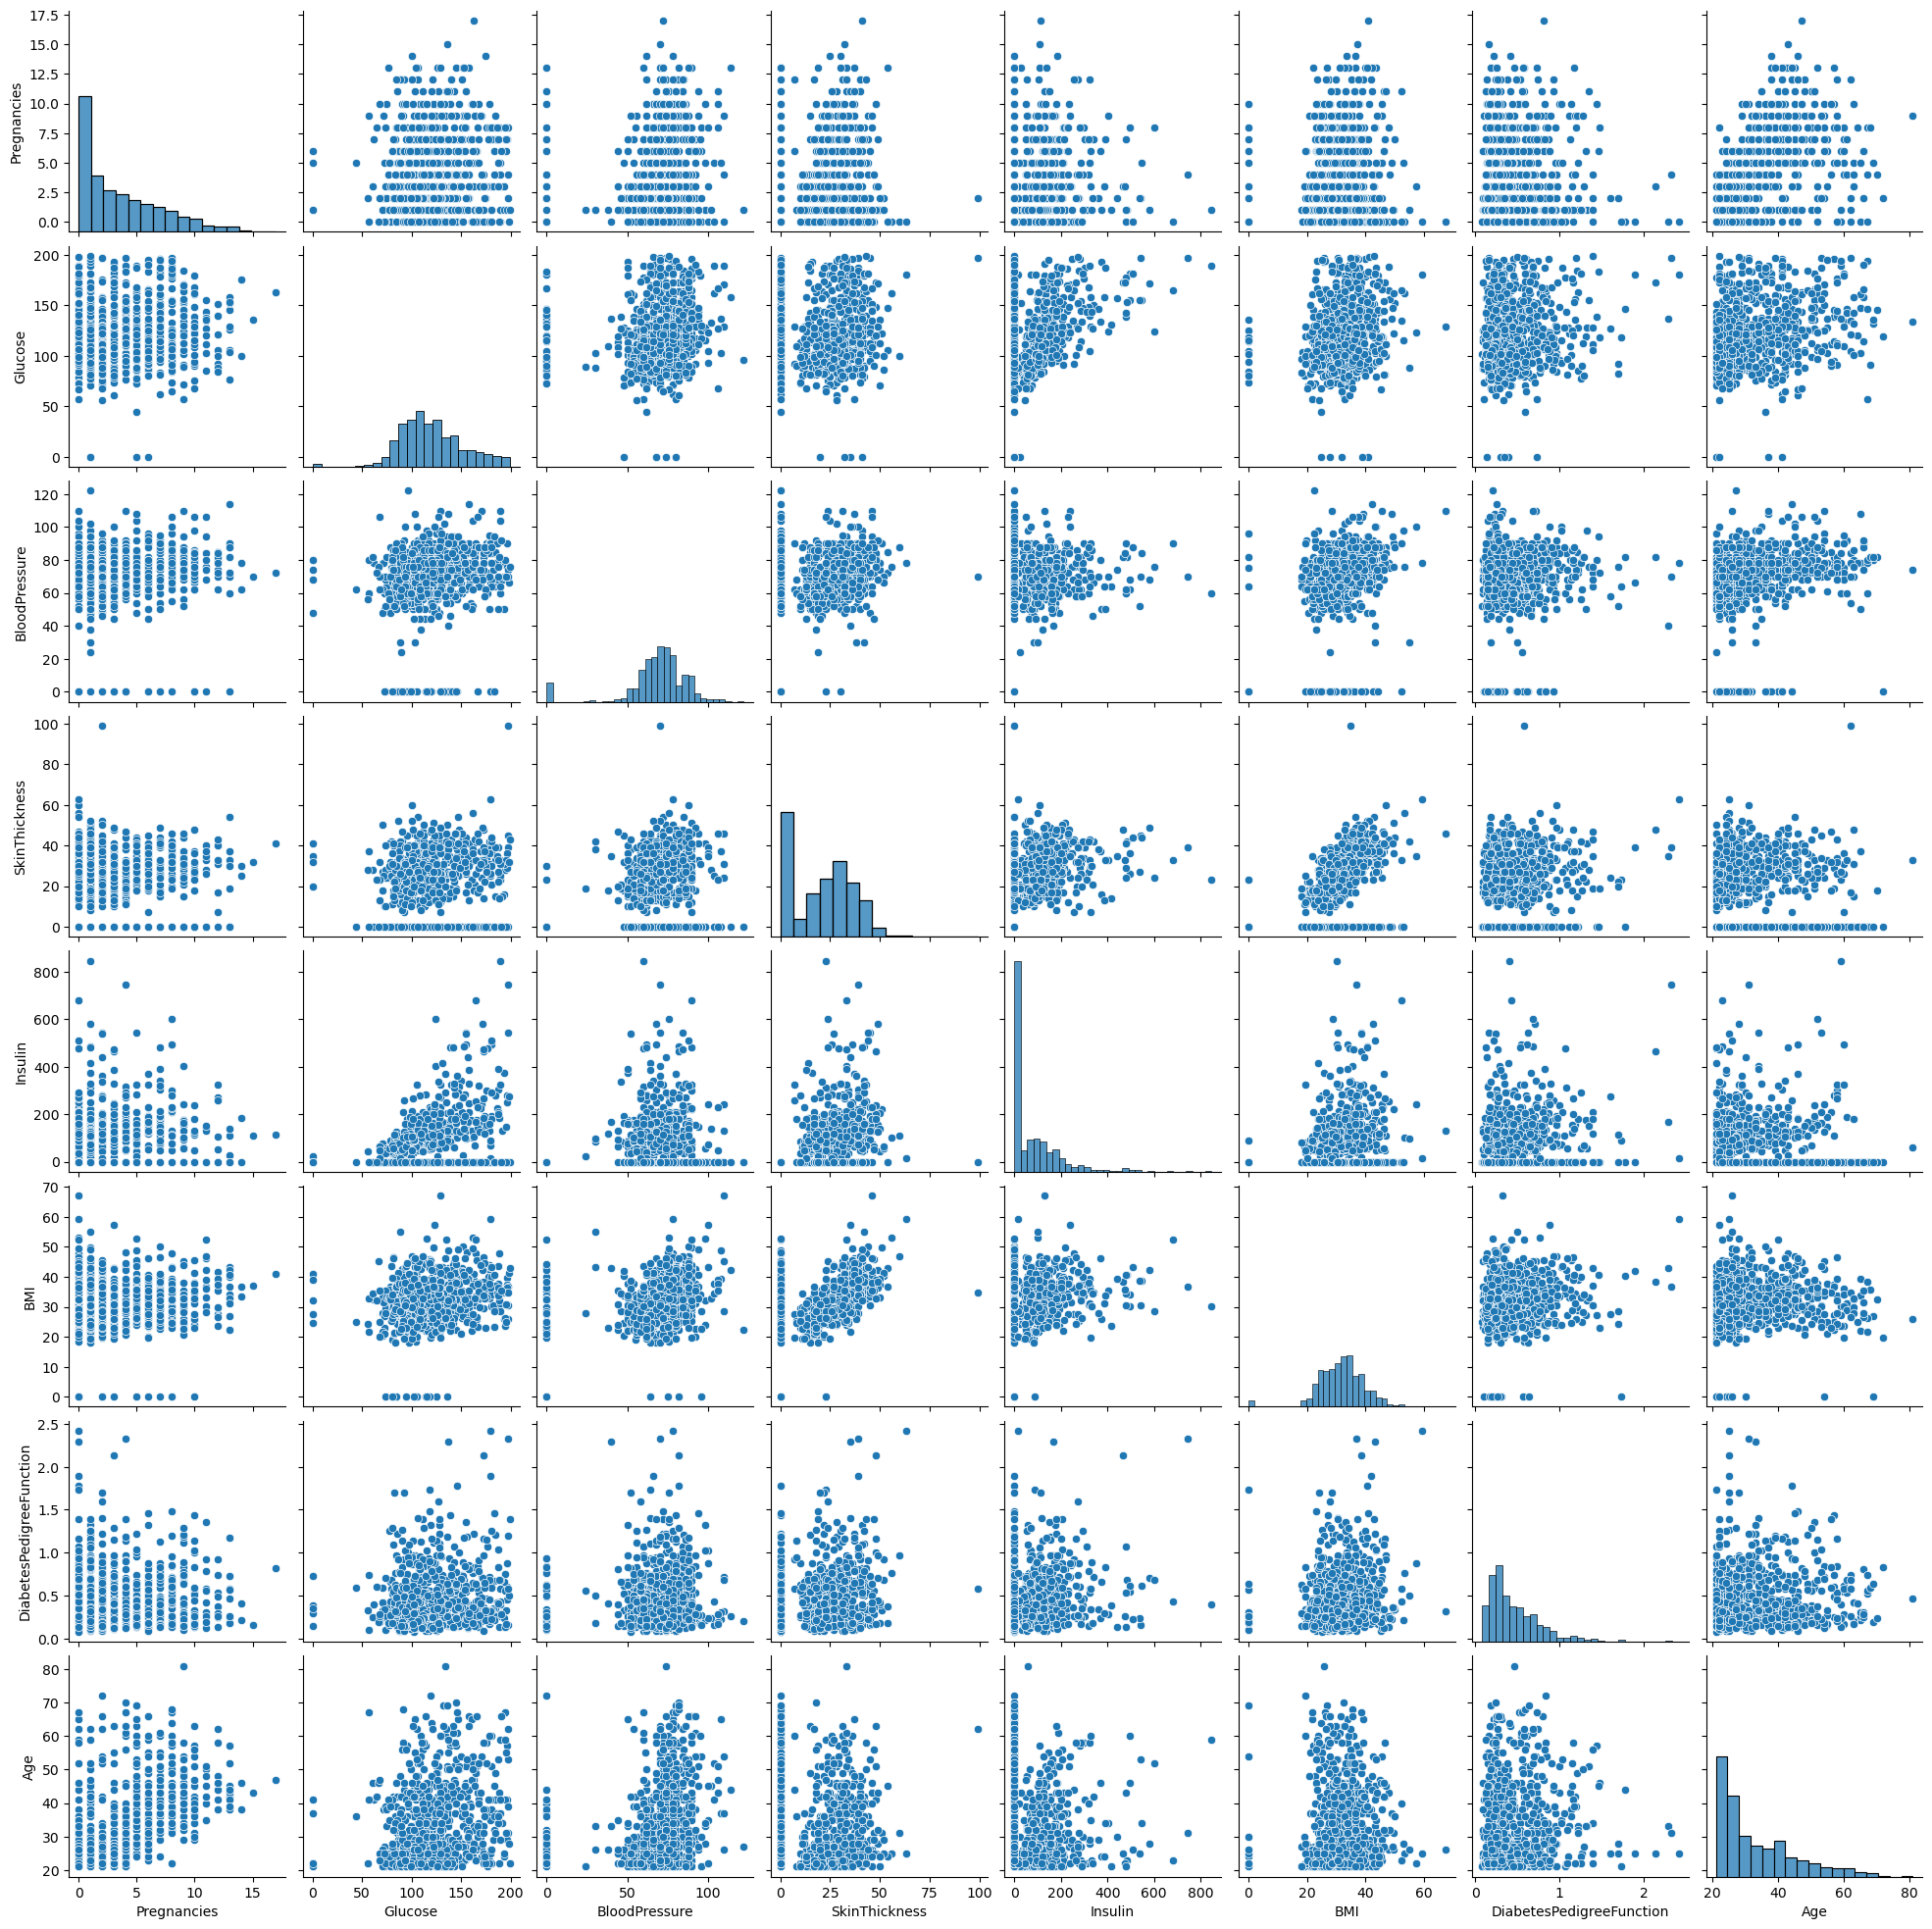

In [10]:
#view pairplots for relationship analysis
sns.pairplot(predictors)
plt.show()

In [11]:
#check for missing values
predictors.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [12]:
#check for missing values
outcome.isnull().sum()

0

In [13]:
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(predictors)
scaled_predictors_df = pd.DataFrame(scaled_predictors, columns=predictors.columns)
scaled_predictors_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [14]:
#choose three clusters 1: no diabetes 2: at risk 3: have diabetes
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_predictors)

# Add the cluster labels to the scaled predictors DataFrame
scaled_predictors_df['Cluster'] = clusters

scaled_predictors_df.head()

C:\Users\Roberto\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Roberto\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0


In [15]:
scaled_predictors_df['Outcome'] = outcome.values

scaled_predictors_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,0,1


In [16]:
outcome_distribution = scaled_predictors_df.groupby('Cluster')['Outcome'].value_counts(normalize=True).unstack()
print(outcome_distribution)

Outcome         0         1
Cluster                    
0        0.752016  0.247984
1        0.466912  0.533088


In [17]:
if outcome_distribution.loc[0, 1] > outcome_distribution.loc[0, 0]:
    scaled_predictors_df['Cluster'] = scaled_predictors_df['Cluster'].map({0: 1, 1: 0})

# Verify the renaming
outcome_distribution_after = scaled_predictors_df.groupby('Cluster')['Outcome'].value_counts(normalize=True).unstack()
print(outcome_distribution_after)

Outcome         0         1
Cluster                    
0        0.752016  0.247984
1        0.466912  0.533088


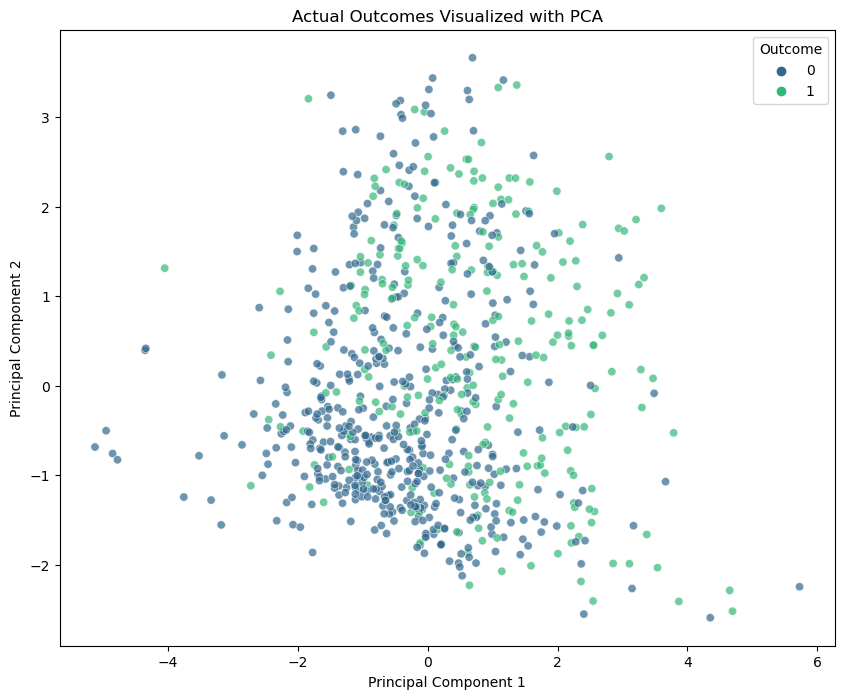

In [18]:


# Standardize the predictors
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(predictors)

#Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_predictors)

# Create a DataFrame with the PCA components and actual outcomes
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = outcome.values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Actual Outcomes Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
# Create a mapping for clusters to outcomes
cluster_to_outcome = {0: 0, 1: 1}

# Map cluster labels to predicted outcomes
predicted_outcomes = scaled_predictors_df['Cluster'].map(cluster_to_outcome)

# Calculate accuracy
accuracy = accuracy_score(outcome, predicted_outcomes)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [20]:
conf_matrix = confusion_matrix(outcome, predicted_outcomes)
print("\nConfusion Matrix:")
print(conf_matrix)

#Generate a classification report
class_report = classification_report(outcome, predicted_outcomes, target_names=['No Diabetes', 'Diabetes'])
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[373 127]
 [123 145]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.75      0.75      0.75       500
    Diabetes       0.53      0.54      0.54       268

    accuracy                           0.67       768
   macro avg       0.64      0.64      0.64       768
weighted avg       0.68      0.67      0.68       768



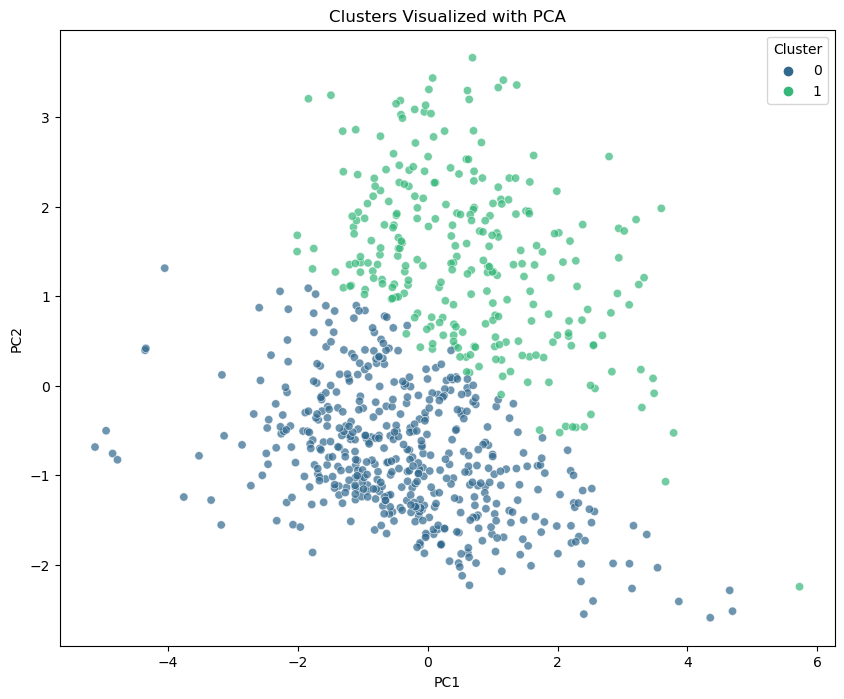

In [21]:
# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_predictors)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters Visualized with PCA')
plt.show()

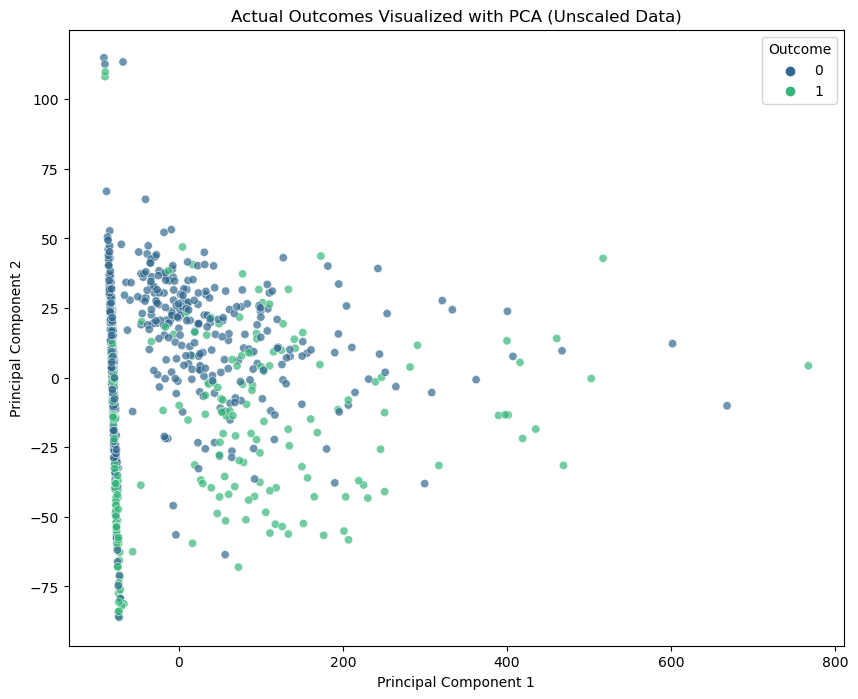

In [22]:

# Apply PCA to reduce the data to 2 dimensions on unscaled predictors
pca_unscaled = PCA(n_components=2)
pca_components_unscaled = pca_unscaled.fit_transform(predictors)

#Create a DataFrame with the PCA components and actual outcomes
pca_df_unscaled = pd.DataFrame(data=pca_components_unscaled, columns=['PC1', 'PC2'])
pca_df_unscaled['Outcome'] = outcome.values

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_unscaled, x='PC1', y='PC2', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Actual Outcomes Visualized with PCA (Unscaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Roberto\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Roberto\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Cluster  
0                     0.627   50        0  
1                     0.351   31        0  
2                     0.672   32        0  
3                     0.167   21        0  
4                     2.288   33        1  


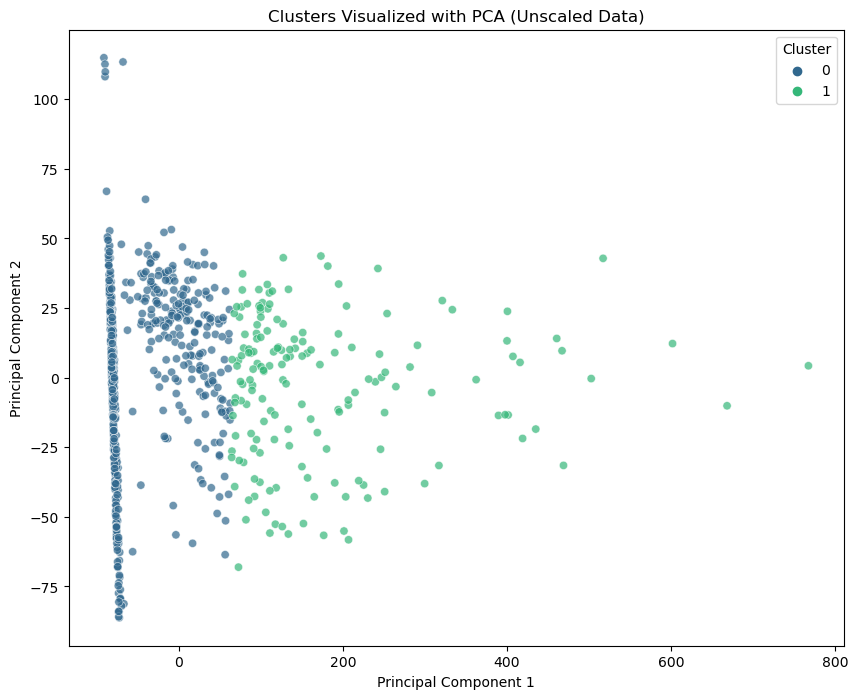

In [23]:
# Apply K-Means clustering with 2 clusters on unscaled data
kmeans_unscaled = KMeans(n_clusters=2, random_state=42)
clusters_unscaled = kmeans_unscaled.fit_predict(predictors)


predictors_unscaled_df = predictors.copy()
predictors_unscaled_df['Cluster'] = clusters_unscaled
print(predictors_unscaled_df.head())

#Apply PCA to reduce the data to 2 dimensions on unscaled predictors
pca_unscaled = PCA(n_components=2)
pca_components_unscaled = pca_unscaled.fit_transform(predictors)

# Create a DataFrame with the PCA components and cluster labels
pca_df_unscaled = pd.DataFrame(data=pca_components_unscaled, columns=['PC1', 'PC2'])
pca_df_unscaled['Cluster'] = clusters_unscaled


plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_unscaled, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters Visualized with PCA (Unscaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Conclusion is kmeans clustering does not work well for this data set. After trying to cluster unscaled and scaled there is no way to accurately seperate the groups. another approach must be taken. One like heirarchical clustering

In [25]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
clusters_hierarchical = hierarchical_clustering.fit_predict(predictors)

In [26]:
predictors_hierarchical_df = predictors.copy()
predictors_hierarchical_df['Cluster'] = clusters_hierarchical

predictors_hierarchical_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


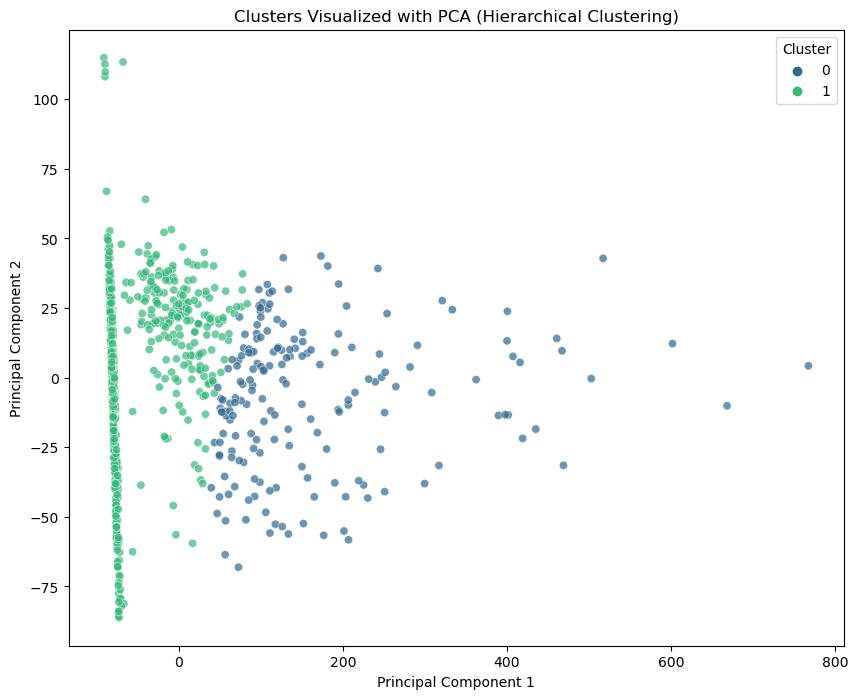

In [27]:
# Apply PCA to reduce the data to 2 dimensions
pca_hierarchical = PCA(n_components=2)
pca_components_hierarchical = pca_hierarchical.fit_transform(predictors)

# Create a DataFrame with the PCA components and cluster labels
pca_df_hierarchical = pd.DataFrame(data=pca_components_hierarchical, columns=['PC1', 'PC2'])
pca_df_hierarchical['Cluster'] = clusters_hierarchical

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_hierarchical, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters Visualized with PCA (Hierarchical Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
predictors_unscaled_df['Outcome'] = outcome.values

# Map clusters to outcomes for unscaled data
# Determine which cluster corresponds to which outcome
outcome_distribution_unscaled = predictors_unscaled_df.groupby('Cluster')['Outcome'].value_counts(normalize=True).unstack()
print("Outcome distribution within unscaled clusters:")
print(outcome_distribution_unscaled)

# Determine cluster to outcome mapping based on majority
cluster_to_outcome_unscaled = {0: 0, 1: 1}
if outcome_distribution_unscaled.loc[0, 1] > outcome_distribution_unscaled.loc[0, 0]:
    cluster_to_outcome_unscaled = {0: 1, 1: 0}

# Map cluster labels to predicted outcomes
predicted_outcomes_unscaled = predictors_unscaled_df['Cluster'].map(cluster_to_outcome_unscaled)

# Calculate accuracy, confusion matrix, and classification report
accuracy_unscaled = accuracy_score(outcome, predicted_outcomes_unscaled)
conf_matrix_unscaled = confusion_matrix(outcome, predicted_outcomes_unscaled)
class_report_unscaled = classification_report(outcome, predicted_outcomes_unscaled, target_names=['No Diabetes', 'Diabetes'])

print(f"Unscaled Data - Accuracy: {accuracy_unscaled:.2f}")
print("\nUnscaled Data - Confusion Matrix:")
print(conf_matrix_unscaled)
print("\nUnscaled Data - Classification Report:")
print(class_report_unscaled)

Outcome distribution within unscaled clusters:
Outcome         0         1
Cluster                    
0        0.698176  0.301824
1        0.478788  0.521212
Unscaled Data - Accuracy: 0.66

Unscaled Data - Confusion Matrix:
[[421  79]
 [182  86]]

Unscaled Data - Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.70      0.84      0.76       500
    Diabetes       0.52      0.32      0.40       268

    accuracy                           0.66       768
   macro avg       0.61      0.58      0.58       768
weighted avg       0.64      0.66      0.64       768



   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Cluster  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


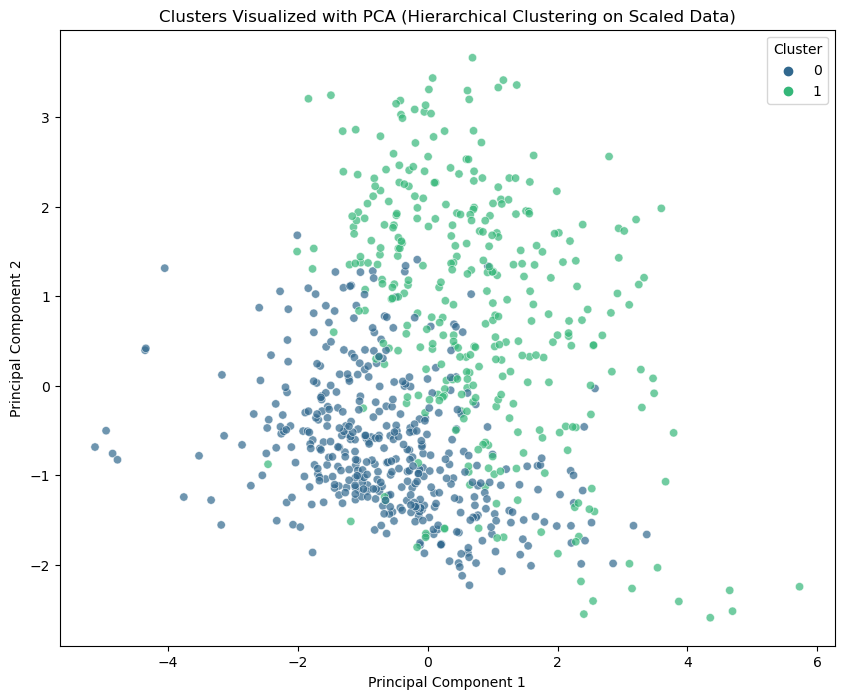

In [29]:
#  Apply Agglomerative Clustering on scaled data
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
clusters_hierarchical = hierarchical_clustering.fit_predict(scaled_predictors)

# Add the cluster labels to the scaled predictors DataFrame
scaled_predictors_df = pd.DataFrame(scaled_predictors, columns=predictors.columns)
scaled_predictors_df['Cluster'] = clusters_hierarchical

# Display the first few rows of the DataFrame with cluster labels
print(scaled_predictors_df.head())

# Step 3: Apply PCA to reduce the data to 2 dimensions
pca_hierarchical = PCA(n_components=2)
pca_components_hierarchical = pca_hierarchical.fit_transform(scaled_predictors)

# Create a DataFrame with the PCA components and cluster labels
pca_df_hierarchical = pd.DataFrame(data=pca_components_hierarchical, columns=['PC1', 'PC2'])
pca_df_hierarchical['Cluster'] = clusters_hierarchical


plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_hierarchical, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters Visualized with PCA (Hierarchical Clustering on Scaled Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [30]:
scaled_predictors_df['Outcome'] = outcome.values

# Map clusters to outcomes for scaled data
# Determine which cluster corresponds to which outcome
outcome_distribution_scaled = scaled_predictors_df.groupby('Cluster')['Outcome'].value_counts(normalize=True).unstack()
print("Outcome distribution within scaled clusters:")
print(outcome_distribution_scaled)

# Determine cluster to outcome mapping based on majority
cluster_to_outcome_scaled = {0: 0, 1: 1}
if outcome_distribution_scaled.loc[0, 1] > outcome_distribution_scaled.loc[0, 0]:
    cluster_to_outcome_scaled = {0: 1, 1: 0}

# Map cluster labels to predicted outcomes
predicted_outcomes_scaled = scaled_predictors_df['Cluster'].map(cluster_to_outcome_scaled)

# Calculate accuracy, confusion matrix, and classification report
accuracy_scaled = accuracy_score(outcome, predicted_outcomes_scaled)
conf_matrix_scaled = confusion_matrix(outcome, predicted_outcomes_scaled)
class_report_scaled = classification_report(outcome, predicted_outcomes_scaled, target_names=['No Diabetes', 'Diabetes'])

print(f"Scaled Data - Accuracy: {accuracy_scaled:.2f}")
print("\nScaled Data - Confusion Matrix:")
print(conf_matrix_scaled)
print("\nScaled Data - Classification Report:")
print(class_report_scaled)

Outcome distribution within scaled clusters:
Outcome         0         1
Cluster                    
0        0.781690  0.218310
1        0.488304  0.511696
Scaled Data - Accuracy: 0.66

Scaled Data - Confusion Matrix:
[[333 167]
 [ 93 175]]

Scaled Data - Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.67      0.72       500
    Diabetes       0.51      0.65      0.57       268

    accuracy                           0.66       768
   macro avg       0.65      0.66      0.65       768
weighted avg       0.69      0.66      0.67       768



Conclusion is that clustering algorithms are not best suited for this data set as the actual outcomes when projected via PCA dont define a clear border or outline for clustering. .67 accuracy was the best that was acheived. This could be further improved by introducing a bias towards higher recall on positive diabetes diagnosises.